# Лабораторная работа №1

Настройка среды для проведения анализа метода ближайшего соседа.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['axes.grid'] = True

## Задание №1

Создать обучающий набор данных $T$ из $N$ (номер варианта, умноженный на 100) векторов $(x_i, t_i)$, где $x$ $-$ случайно выбранная из отрезка $[0;1]$ величина,
$t = \sin(2\pi x) + \varepsilon$, а $\varepsilon$ $-$ гауссова величина с нулевым средним и СКО = 0.3.

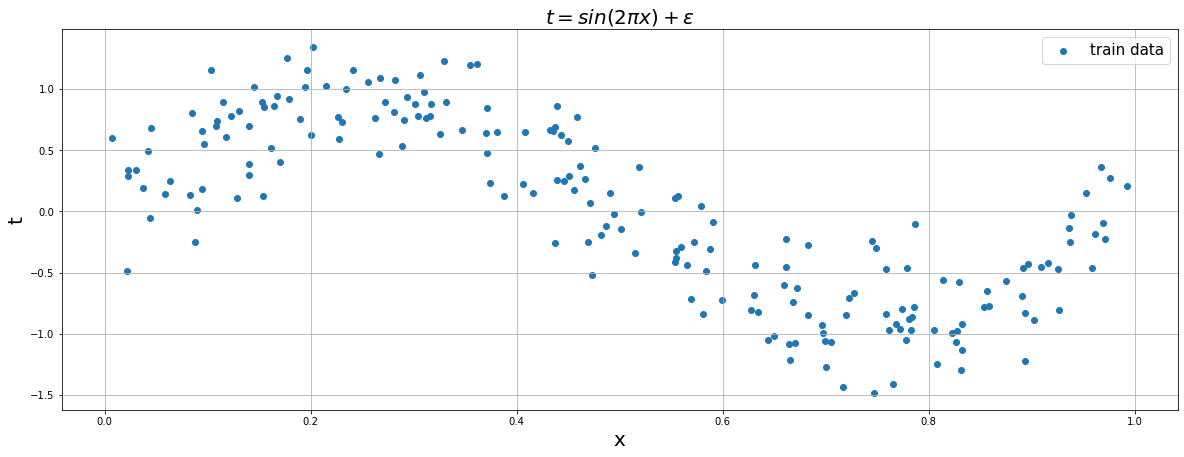

In [27]:
rng = np.random.default_rng(seed=42)

N = 200
sigma = 0.3
x_train = rng.uniform(size=N)
y_train = np.sin(2*np.pi*x_train) + rng.normal(scale=sigma, size=len(x_train))

plt.figure(figsize=(20,7))
plt.scatter(x_train, y_train)
plt.xlabel('x', {'size': 20})
plt.ylabel('t', {'size': 20})
plt.legend(['train data'], fontsize = 15)
plt.title('$t = sin(2\pi x) + \epsilon$', {'size': 20});

## Задание №2

Создать аналогичным образом тестовый набор данных $T'$ из других $N/4$ тестовых векторов $(x_i, t_i)$.
Деление нацело в питоне - это операция `a // b`.

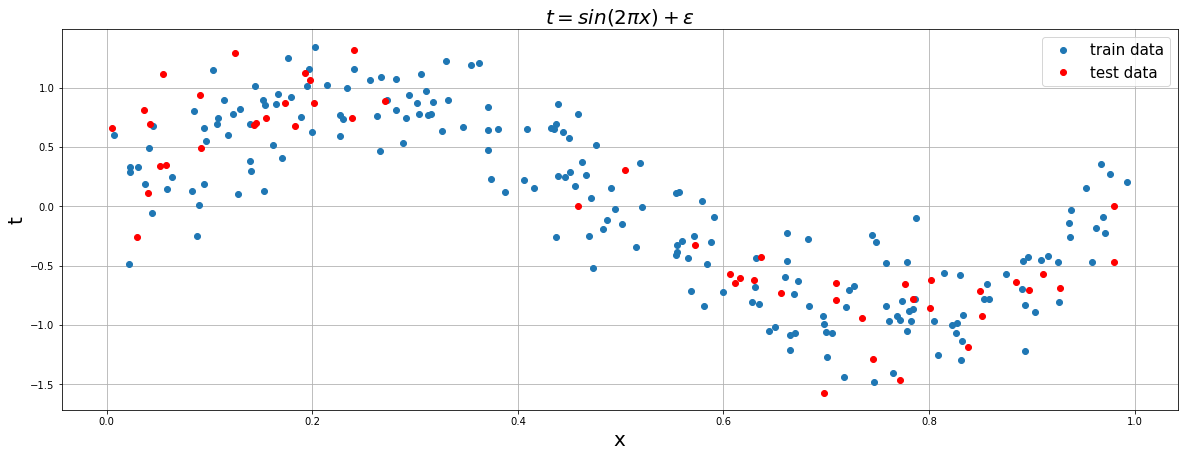

In [28]:
x_test = rng.uniform(size=N//4)
y_test = np.sin(2*np.pi*x_test) + rng.normal(scale=sigma, size=len(x_test))


plt.figure(figsize=(20,7))
plt.plot(x, t, 'o')
plt.plot(xx, tt, 'ro')
plt.xlabel('x', {'size': 20})
plt.ylabel('t', {'size': 20})
plt.legend(['train data', 'test data'], fontsize = 15)
plt.title('$t = sin(2\pi x) + \epsilon$', {'size': 20});

## Задание №3

Методом $k$-NN с различными $k$ (обязательно рассмотреть $k = 1$ и $k = N$) определить среднюю ошибку
$E(f, T) = \frac{1}{N} \sum_{i=1}^{N} E\left( f(x_i), t_i \right)$
(штрафная функция $-$ квадрат разности истинного и предсказанного значений $E(r, y) = {\lVert r - y \rVert}^2$)  для обучающего и для тестового наборов.
Построить зависимости средних ошибок от $k$ в виде 2 графиков для $E(T)$ и $E(T')$.

Loss-function get min at the 3 neighbors and it equals 0.12663414935337525
Wall time: 2.31 s


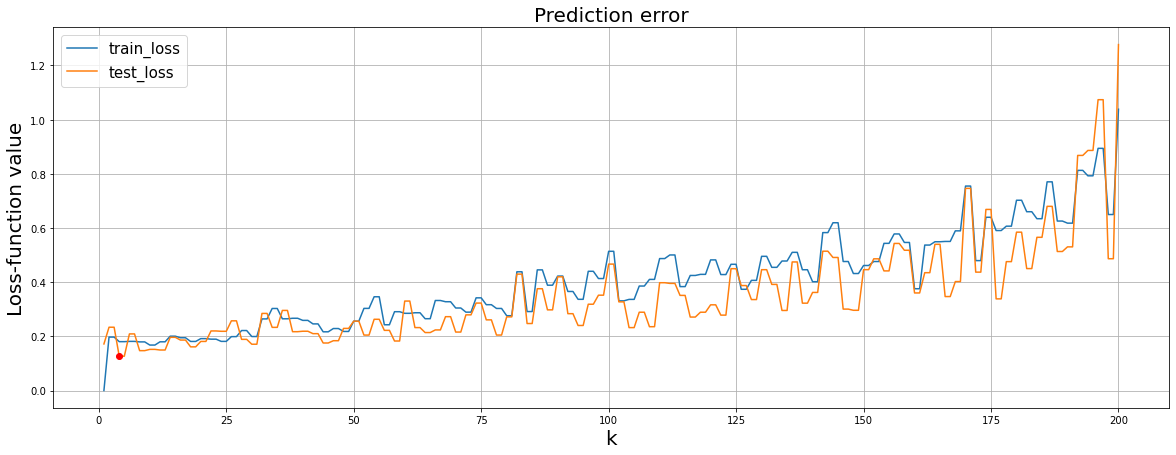

In [29]:
%%time

def err(f, t):
    return ((f - t) ** 2).mean()

class KMean:
    def __init__(self, k, x, t):
        self.k, self.x, self.t = k, x, t

    def _decision(self, m):
        e = (self.x - m) ** 2
        idx = e.argpartition(np.arange(self.k))[self.k // 2]
        return self.t[idx]

    def __call__(self, xx):
        return np.array([self._decision(m) for m in xx])

k = np.arange(1, len(x_train) + 1)
train_loss, test_loss = [], []
for kk in k:
  kmean = KMean(kk, x_train, y_train)
  train_loss.append(err(kmean(x_train), y_train))
  test_loss.append(err(kmean(x_test), y_test))

m = np.argmin(test_loss)

plt.figure(figsize=(20,7))
plt.plot(k, train_loss)
plt.plot(k, test_loss)
plt.plot(range(1, N + 1)[m], test_loss[m], 'ro')
plt.xlabel('k', {'size': 20})
plt.ylabel('Loss-function value', {'size': 20})
plt.legend(['train_loss', 'test_loss'], fontsize = 15)
plt.title('Prediction error', {'size': 20});

print("Loss-function get min at the {0} neighbors and it equals {1}".format(m,test_loss[m]))

## Задание №4

По графикам, полученным в п.3, сделайте выводы о характере зависимости эмпирического риска $E(f, T)$ от $k$.
Определите значение $k$, для которого значение ошибки $E(f, T)$ получается наименьшим.
Сравните значения ошибок, получаемых на обучающем и тестовом наборах данных.

### Выводы

1. Наименьшее $k$, для которого наблюдается минимальное значение ошибки, равно $3$. Данное значение зависит, от обучающего и тестового наборов данных, т. е. при других данных можно получить другое значение $k$, обеспечивающее минимальное значение ошибки.

2. При $k = 1$ на обучающем наборе данных ошибка равна $0$, т. к. для каждой точки из этого набора ближайшим соседом является она сама, и, следовательно, квадрат разности значений равен $0$.